In [1083]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns






In [1084]:
df_train=pd.read_csv('bigmart_train.csv')

In [1085]:
df_test=pd.read_csv('bigmart_test.csv')

In [1086]:
df_train

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,NaN,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976


In [1087]:
df_train['Outlet_Establishment_Year'].value_counts()

1985    1463
1987     932
2004     930
1997     930
1999     930
2002     929
2009     928
2007     926
1998     555
Name: Outlet_Establishment_Year, dtype: int64

In [1088]:
df_train['Item_Fat_Content']=df_train['Item_Fat_Content'].replace('LF','Low Fat')
df_train['Item_Fat_Content']=df_train['Item_Fat_Content'].replace('reg','Regular')
df_train['Item_Fat_Content']=df_train['Item_Fat_Content'].replace('low fat','Low Fat')

In [1089]:
df_test['Item_Fat_Content']=df_test['Item_Fat_Content'].replace('LF','Low Fat')
df_test['Item_Fat_Content']=df_test['Item_Fat_Content'].replace('reg','Regular')
df_test['Item_Fat_Content']=df_test['Item_Fat_Content'].replace('low fat','Low Fat')

In [1090]:
df_train['Item_Fat_Content'].value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

In [1091]:
df_test['Item_Fat_Content'].value_counts()

Low Fat    3668
Regular    2013
Name: Item_Fat_Content, dtype: int64

In [1092]:
df_test

ans1=df_test['Item_Identifier']
ans2=df_test['Outlet_Identifier']

In [1093]:
df_train.nunique()

Item_Identifier              1559
Item_Weight                   415
Item_Fat_Content                2
Item_Visibility              7880
Item_Type                      16
Item_MRP                     5938
Outlet_Identifier              10
Outlet_Establishment_Year       9
Outlet_Size                     3
Outlet_Location_Type            3
Outlet_Type                     4
Item_Outlet_Sales            3493
dtype: int64

In [1094]:
df_test.nunique()

Item_Identifier              1543
Item_Weight                   410
Item_Fat_Content                2
Item_Visibility              5277
Item_Type                      16
Item_MRP                     4402
Outlet_Identifier              10
Outlet_Establishment_Year       9
Outlet_Size                     3
Outlet_Location_Type            3
Outlet_Type                     4
dtype: int64

In [1095]:
df_train['Outlet_Size'].value_counts()

Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64

In [1096]:
# i looked for every column to find the missing values and found that
# only Item_weight has 1463 null rows and
# 2410 rows of Outlet_size are null


bool_series =pd.isnull(df_train['Item_Outlet_Sales'])
df_train[bool_series]

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales


In [1097]:
# i looked for every column to find the missing values and found that
# only Item_weight has 976 null rows and
# 1606 rows of Outlet_size are null

bool_series =pd.isnull(df_test['Item_Weight'])
df_test[bool_series]

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3
7,FDC48,NaN,Low Fat,0.015782,Baking Goods,81.0592,OUT027,1985,Medium,Tier 3,Supermarket Type3
12,NCC54,NaN,Low Fat,0.171079,Health and Hygiene,240.4196,OUT019,1985,Small,Tier 1,Grocery Store
18,NCM42,NaN,Low Fat,0.028184,Household,109.6912,OUT027,1985,Medium,Tier 3,Supermarket Type3
23,NCL19,NaN,Low Fat,0.027447,Others,142.3470,OUT019,1985,Small,Tier 1,Grocery Store
...,...,...,...,...,...,...,...,...,...,...,...
5655,FDX32,NaN,Regular,0.099375,Fruits and Vegetables,143.6786,OUT027,1985,Medium,Tier 3,Supermarket Type3
5656,FDC39,NaN,Low Fat,0.158425,Dairy,207.8296,OUT027,1985,Medium,Tier 3,Supermarket Type3
5661,DRG37,NaN,Low Fat,0.000000,Soft Drinks,155.7972,OUT027,1985,Medium,Tier 3,Supermarket Type3
5665,DRE03,NaN,Low Fat,0.024110,Dairy,46.0718,OUT027,1985,Medium,Tier 3,Supermarket Type3


In [1098]:
#dataset which contain null values for any column
null_data = df_train[df_train.isnull().any(axis=1)]
null_data

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
7,FDP10,NaN,Low Fat,0.127470,Snack Foods,107.7622,OUT027,1985,Medium,Tier 3,Supermarket Type3,4022.7636
8,FDH17,16.20,Regular,0.016687,Frozen Foods,96.9726,OUT045,2002,NaN,Tier 2,Supermarket Type1,1076.5986
9,FDU28,19.20,Regular,0.094450,Frozen Foods,187.8214,OUT017,2007,NaN,Tier 2,Supermarket Type1,4710.5350
18,DRI11,NaN,Low Fat,0.034238,Hard Drinks,113.2834,OUT027,1985,Medium,Tier 3,Supermarket Type3,2303.6680
...,...,...,...,...,...,...,...,...,...,...,...,...
8504,NCN18,NaN,Low Fat,0.124111,Household,111.7544,OUT027,1985,Medium,Tier 3,Supermarket Type3,4138.6128
8508,FDW31,11.35,Regular,0.043246,Fruits and Vegetables,199.4742,OUT045,2002,NaN,Tier 2,Supermarket Type1,2587.9646
8509,FDG45,8.10,Low Fat,0.214306,Fruits and Vegetables,213.9902,OUT010,1998,NaN,Tier 3,Grocery Store,424.7804
8514,FDA01,15.00,Regular,0.054489,Canned,57.5904,OUT045,2002,NaN,Tier 2,Supermarket Type1,468.7232


In [1099]:
df_train['Item_Weight']=df_train['Item_Weight'].fillna(df_train['Item_Weight'].mean())
bool_series =pd.isnull(df_train['Item_Weight'])
df_train[bool_series]

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales


In [1100]:
df_test['Item_Weight']=df_test['Item_Weight'].fillna(df_test['Item_Weight'].mean())
bool_series =pd.isnull(df_test['Item_Weight'])
df_test[bool_series]

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type


In [1101]:
df_train['Outlet_Size']=df_train['Outlet_Size'].fillna(method='ffill')
df_train['Outlet_Size'].value_counts()

bool_series =pd.isnull(df_train['Outlet_Size'])
df_train[bool_series]


,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales


In [1102]:
df_test['Outlet_Size']=df_test['Outlet_Size'].fillna(method='ffill')
df_test['Outlet_Size'].value_counts()

bool_series =pd.isnull(df_test['Outlet_Size'])
df_test[bool_series]

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type


In [1103]:
#so finally we dealt with the missing values

In [1104]:
#now we check for duplicate values in the dataframe

dups = df_train.duplicated()
# report if there are any duplicates
print(dups.any())
# list all duplicate rows
print(df_train[dups])

#so there are no duplicate values in the dataset

False
Empty DataFrame
Columns: [Item_Identifier, Item_Weight, Item_Fat_Content, Item_Visibility, Item_Type, Item_MRP, Outlet_Identifier, Outlet_Establishment_Year, Outlet_Size, Outlet_Location_Type, Outlet_Type, Item_Outlet_Sales]
Index: []


In [1105]:
dups = df_test.duplicated()
# report if there are any duplicates
print(dups.any())
# list all duplicate rows
print(df_test[dups])

False
Empty DataFrame
Columns: [Item_Identifier, Item_Weight, Item_Fat_Content, Item_Visibility, Item_Type, Item_MRP, Outlet_Identifier, Outlet_Establishment_Year, Outlet_Size, Outlet_Location_Type, Outlet_Type]
Index: []


In [1106]:
# Q1 = df_train.quantile(0.25)
# Q3 = df_train.quantile(0.75)
# IQR = Q3 - Q1
# IQR

In [1107]:
# df_train = df_train[~((df_train < (Q1 - 1.5 * IQR)) | (df_train > (Q3 + 1.5 * IQR))).any(axis=1)]

In [1108]:
df_train

#now the dataset contains 8193 columns which means 330 rows have been removed

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,High,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976


In [1109]:
df_test

#now the dataset contains 5568 columns which means 113 rows have been removed

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750000,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300000,Regular,0.038428,Dairy,87.3198,OUT017,2007,Medium,Tier 2,Supermarket Type1
2,NCN55,14.600000,Low Fat,0.099575,Others,241.7538,OUT010,1998,Medium,Tier 3,Grocery Store
3,FDQ58,7.315000,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,Medium,Tier 2,Supermarket Type1
4,FDY38,12.695633,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3
...,...,...,...,...,...,...,...,...,...,...,...
5676,FDB58,10.500000,Regular,0.013496,Snack Foods,141.3154,OUT046,1997,Small,Tier 1,Supermarket Type1
5677,FDD47,7.600000,Regular,0.142991,Starchy Foods,169.1448,OUT018,2009,Medium,Tier 3,Supermarket Type2
5678,NCO17,10.000000,Low Fat,0.073529,Health and Hygiene,118.7440,OUT045,2002,Medium,Tier 2,Supermarket Type1
5679,FDJ26,15.300000,Regular,0.000000,Canned,214.6218,OUT017,2007,Medium,Tier 2,Supermarket Type1


In [1110]:
from sklearn.preprocessing import LabelEncoder
scaler=LabelEncoder()
df_train['Item_Identifier']=scaler.fit_transform(df_train['Item_Identifier'])
df_train['Item_Fat_Content']=scaler.fit_transform(df_train['Item_Fat_Content'])
df_train['Item_Type']=scaler.fit_transform(df_train['Item_Type'])
df_train['Outlet_Identifier']=scaler.fit_transform(df_train['Outlet_Identifier'])
df_train['Outlet_Size']=scaler.fit_transform(df_train['Outlet_Size'])
df_train['Outlet_Location_Type']=scaler.fit_transform(df_train['Outlet_Location_Type'])
df_train['Outlet_Type']=scaler.fit_transform(df_train['Outlet_Type'])
df_train['Outlet_Establishment_Year']=scaler.fit_transform(df_train['Outlet_Establishment_Year'])


In [1111]:
df_test

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750000,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300000,Regular,0.038428,Dairy,87.3198,OUT017,2007,Medium,Tier 2,Supermarket Type1
2,NCN55,14.600000,Low Fat,0.099575,Others,241.7538,OUT010,1998,Medium,Tier 3,Grocery Store
3,FDQ58,7.315000,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,Medium,Tier 2,Supermarket Type1
4,FDY38,12.695633,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3
...,...,...,...,...,...,...,...,...,...,...,...
5676,FDB58,10.500000,Regular,0.013496,Snack Foods,141.3154,OUT046,1997,Small,Tier 1,Supermarket Type1
5677,FDD47,7.600000,Regular,0.142991,Starchy Foods,169.1448,OUT018,2009,Medium,Tier 3,Supermarket Type2
5678,NCO17,10.000000,Low Fat,0.073529,Health and Hygiene,118.7440,OUT045,2002,Medium,Tier 2,Supermarket Type1
5679,FDJ26,15.300000,Regular,0.000000,Canned,214.6218,OUT017,2007,Medium,Tier 2,Supermarket Type1


In [1112]:
df_test['Item_Identifier']=scaler.fit_transform(df_test['Item_Identifier'])
df_test['Item_Fat_Content']=scaler.fit_transform(df_test['Item_Fat_Content'])
df_test['Item_Type']=scaler.fit_transform(df_test['Item_Type'])
df_test['Outlet_Identifier']=scaler.fit_transform(df_test['Outlet_Identifier'])
df_test['Outlet_Size']=scaler.fit_transform(df_test['Outlet_Size'])
df_test['Outlet_Location_Type']=scaler.fit_transform(df_test['Outlet_Location_Type'])
df_test['Outlet_Type']=scaler.fit_transform(df_test['Outlet_Type'])
df_test['Outlet_Establishment_Year']=scaler.fit_transform(df_test['Outlet_Establishment_Year'])

In [1113]:
df_train

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,156,9.300,0,0.016047,4,249.8092,9,4,1,0,1,3735.1380
1,8,5.920,1,0.019278,14,48.2692,3,8,1,2,2,443.4228
2,662,17.500,0,0.016760,10,141.6180,9,4,1,0,1,2097.2700
3,1121,19.200,1,0.000000,6,182.0950,0,3,1,2,0,732.3800
4,1297,8.930,0,0.000000,9,53.8614,1,1,0,2,1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,370,6.865,0,0.056783,13,214.5218,1,1,0,2,1,2778.3834
8519,897,8.380,1,0.046982,0,108.1570,7,5,0,1,1,549.2850
8520,1357,10.600,0,0.035186,8,85.1224,6,6,2,1,1,1193.1136
8521,681,7.210,1,0.145221,13,103.1332,3,8,1,2,2,1845.5976


In [1114]:
from sklearn.preprocessing import StandardScaler,MinMaxScaler
scaler_other=MinMaxScaler()

df_train['Item_Weight']=scaler_other.fit_transform(df_train[['Item_Weight']])
df_train['Item_Visibility']=scaler_other.fit_transform(df_train[['Item_Visibility']])

df_train['Item_MRP']=scaler_other.fit_transform(df_train[['Item_MRP']])

# df_train['Item_Outlet_Sales']=scaler_other.fit_transform(df_train[['Item_Outlet_Sales']])



In [1115]:
df_test['Item_Weight']=scaler_other.fit_transform(df_test[['Item_Weight']])
df_test['Item_Visibility']=scaler_other.fit_transform(df_test[['Item_Visibility']])

df_test['Item_MRP']=scaler_other.fit_transform(df_test[['Item_MRP']])


In [1116]:
# df_train
df_test['Item_Weight'].min()
df_train['Item_Weight'].min()

0.0

In [1117]:
df_test

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,1103,0.964275,0,0.023374,13,0.323413,9,4,1,0,1
1,1067,0.222983,1,0.118737,4,0.235849,2,7,1,1,1
2,1406,0.598095,0,0.307674,11,0.894140,0,3,1,2,0
3,809,0.164335,0,0.047548,13,0.524488,2,7,1,1,1
4,1184,0.484706,1,0.366458,4,0.862069,5,0,1,2,3
...,...,...,...,...,...,...,...,...,...,...,...
5676,231,0.353974,1,0.041702,13,0.466011,8,2,2,0,1
5677,306,0.181304,1,0.441825,15,0.584637,3,8,1,2,2
5678,1412,0.324204,0,0.227194,8,0.369798,7,5,1,1,1
5679,517,0.639774,1,0.000000,3,0.778487,2,7,1,1,1


In [1118]:
df_train.corr()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
Item_Identifier,1.000000,0.044518,-0.114660,-0.025482,-0.017973,0.012853,-0.008602,-0.014288,-0.003041,0.003656,-0.001178,0.002869
Item_Weight,0.044518,1.000000,-0.021157,-0.012049,0.028015,0.024756,-0.007975,-0.007489,-0.007891,0.004088,-0.000566,0.011550
Item_Fat_Content,-0.114660,-0.021157,1.000000,0.047314,-0.139434,0.006063,0.000764,0.002447,0.001652,-0.001598,0.002199,0.018719
Item_Visibility,-0.025482,-0.012049,0.047314,1.000000,-0.035249,-0.001315,-0.100439,-0.082927,0.059453,-0.028099,-0.173468,-0.128625
Item_Type,-0.017973,0.028015,-0.139434,-0.035249,1.000000,0.032651,0.001656,0.006527,-0.006544,0.003084,0.003053,0.017048
Item_MRP,0.012853,0.024756,0.006063,-0.001315,0.032651,1.000000,0.003319,0.004162,-0.002807,0.000232,-0.001975,0.567574
Outlet_Identifier,-0.008602,-0.007975,0.000764,-0.100439,0.001656,0.003319,1.000000,-0.030969,0.380665,-0.716176,0.099873,0.162325
Outlet_Establishment_Year,-0.014288,-0.007489,0.002447,-0.082927,0.006527,0.004162,-0.030969,1.000000,0.118460,0.042005,-0.040040,-0.025525
Outlet_Size,-0.003041,-0.007891,0.001652,0.059453,-0.006544,-0.002807,0.380665,0.118460,1.000000,-0.514984,-0.227312,-0.100382
Outlet_Location_Type,0.003656,0.004088,-0.001598,-0.028099,0.003084,0.000232,-0.716176,0.042005,-0.514984,1.000000,0.467219,0.089367


In [1119]:
# del df_train['Item_Fat_Content']
# del df_test['Item_Fat_Content']
# plt.scatter(df_train['Outlet_Size'],df_train['Item_Outlet_Sales'])
del df_train['Outlet_Size']
del df_test['Outlet_Size']

[9 3 0 1 5 7 2 8 6 4]


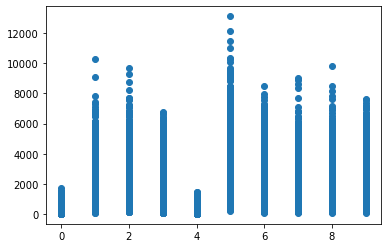

In [1120]:
print(df_train['Outlet_Identifier'].unique())
plt.scatter(df_train['Outlet_Identifier'],df_train['Item_Outlet_Sales'])

[4 8 3 1 0 5 7 2 6]


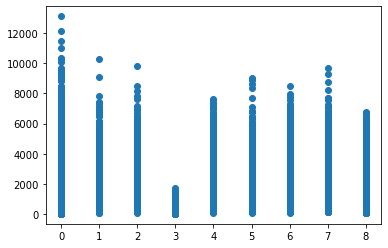

In [1121]:
print(df_train['Outlet_Establishment_Year'].unique())
plt.scatter(df_train['Outlet_Establishment_Year'],df_train['Item_Outlet_Sales'])

In [1122]:
print(df_train['Item_Fat_Content'].unique())
# plt.scatter(df_train['Item_Fat_Content'],df_train['Item_Outlet_Sales'])

#also as we see the fat content correlation with outlet sales , we see that it's close t zero and hence 
# we can delete this column

# del df_train['Outlet_Establishment_Year']
# del df_test['Outlet_Establishment_Year']

[0 1]


1    5577
0    1083
3     935
2     928
Name: Outlet_Type, dtype: int64


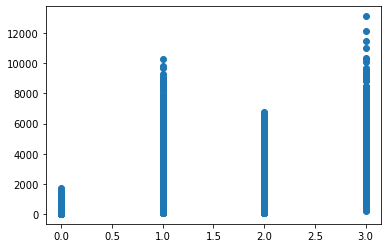

In [1123]:
print(df_train['Outlet_Type'].value_counts())
plt.scatter(df_train['Outlet_Type'],df_train['Item_Outlet_Sales'])

In [1124]:
y_train=df_train['Item_Outlet_Sales']
del df_train['Item_Outlet_Sales']
X_train=df_train


In [1125]:
# y_train=scaler_other.fit_transform([y_train])

In [1126]:
X_train

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Location_Type,Outlet_Type
0,156,0.282525,0,0.048866,4,0.927507,9,4,0,1
1,8,0.081274,1,0.058705,14,0.072068,3,8,2,2
2,662,0.770765,0,0.051037,10,0.468288,9,4,0,1
3,1121,0.871986,1,0.000000,6,0.640093,0,3,2,0
4,1297,0.260494,0,0.000000,9,0.095805,1,1,2,1
...,...,...,...,...,...,...,...,...,...,...
8518,370,0.137541,0,0.172914,13,0.777729,1,1,2,1
8519,897,0.227746,1,0.143069,0,0.326263,7,5,1,1
8520,1357,0.359929,0,0.107148,8,0.228492,6,6,1,1
8521,681,0.158083,1,0.442219,13,0.304939,3,8,2,2


In [1127]:
# del X_train['Item_Identifier']
# del df_test['Item_Identifier']

In [1128]:
# del X_train['Outlet_Identifier']
# del df_test['Outlet_Identifier']

In [1129]:
X_train['Item_Fat_Content'].value_counts()

0    5517
1    3006
Name: Item_Fat_Content, dtype: int64

In [1130]:
X_test=df_test

In [1131]:
X_test

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Location_Type,Outlet_Type
0,1103,0.964275,0,0.023374,13,0.323413,9,4,0,1
1,1067,0.222983,1,0.118737,4,0.235849,2,7,1,1
2,1406,0.598095,0,0.307674,11,0.894140,0,3,2,0
3,809,0.164335,0,0.047548,13,0.524488,2,7,1,1
4,1184,0.484706,1,0.366458,4,0.862069,5,0,2,3
...,...,...,...,...,...,...,...,...,...,...
5676,231,0.353974,1,0.041702,13,0.466011,8,2,0,1
5677,306,0.181304,1,0.441825,15,0.584637,3,8,2,2
5678,1412,0.324204,0,0.227194,8,0.369798,7,5,1,1
5679,517,0.639774,1,0.000000,3,0.778487,2,7,1,1


In [1132]:
X_train['Outlet_Location_Type'].value_counts()
X_train['Outlet_Type'].value_counts()

1    5577
0    1083
3     935
2     928
Name: Outlet_Type, dtype: int64

In [1133]:
del X_train['Item_Weight']
del X_test['Item_Weight']

In [1134]:
X_train.corr()

,Item_Identifier,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Location_Type,Outlet_Type
Item_Identifier,1.000000,-0.114660,-0.025482,-0.017973,0.012853,-0.008602,-0.014288,0.003656,-0.001178
Item_Fat_Content,-0.114660,1.000000,0.047314,-0.139434,0.006063,0.000764,0.002447,-0.001598,0.002199
Item_Visibility,-0.025482,0.047314,1.000000,-0.035249,-0.001315,-0.100439,-0.082927,-0.028099,-0.173468
Item_Type,-0.017973,-0.139434,-0.035249,1.000000,0.032651,0.001656,0.006527,0.003084,0.003053
Item_MRP,0.012853,0.006063,-0.001315,0.032651,1.000000,0.003319,0.004162,0.000232,-0.001975
Outlet_Identifier,-0.008602,0.000764,-0.100439,0.001656,0.003319,1.000000,-0.030969,-0.716176,0.099873
Outlet_Establishment_Year,-0.014288,0.002447,-0.082927,0.006527,0.004162,-0.030969,1.000000,0.042005,-0.040040
Outlet_Location_Type,0.003656,-0.001598,-0.028099,0.003084,0.000232,-0.716176,0.042005,1.000000,0.467219
Outlet_Type,-0.001178,0.002199,-0.173468,0.003053,-0.001975,0.099873,-0.040040,0.467219,1.000000


In [1135]:
# del X_train['Outlet_Location_Type']
# del X_test['Outlet_Location_Type']

In [1136]:
X_train.corr()

,Item_Identifier,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Location_Type,Outlet_Type
Item_Identifier,1.000000,-0.114660,-0.025482,-0.017973,0.012853,-0.008602,-0.014288,0.003656,-0.001178
Item_Fat_Content,-0.114660,1.000000,0.047314,-0.139434,0.006063,0.000764,0.002447,-0.001598,0.002199
Item_Visibility,-0.025482,0.047314,1.000000,-0.035249,-0.001315,-0.100439,-0.082927,-0.028099,-0.173468
Item_Type,-0.017973,-0.139434,-0.035249,1.000000,0.032651,0.001656,0.006527,0.003084,0.003053
Item_MRP,0.012853,0.006063,-0.001315,0.032651,1.000000,0.003319,0.004162,0.000232,-0.001975
Outlet_Identifier,-0.008602,0.000764,-0.100439,0.001656,0.003319,1.000000,-0.030969,-0.716176,0.099873
Outlet_Establishment_Year,-0.014288,0.002447,-0.082927,0.006527,0.004162,-0.030969,1.000000,0.042005,-0.040040
Outlet_Location_Type,0.003656,-0.001598,-0.028099,0.003084,0.000232,-0.716176,0.042005,1.000000,0.467219
Outlet_Type,-0.001178,0.002199,-0.173468,0.003053,-0.001975,0.099873,-0.040040,0.467219,1.000000


In [1137]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import Ridge,Lasso,LinearRegression
model = RandomForestRegressor(max_depth=5,max_features=7,random_state=0).fit(X_train,y_train)
# model=DecisionTreeRegressor(max_depth=5).fit(X_train,y_train)

In [1138]:
from sklearn.model_selection import cross_val_score

cv_scores=cross_val_score(model,X_train.to_numpy(),np.ravel(y_train),cv=5,scoring='neg_root_mean_squared_error')
print(np.mean(cv_scores))

-1085.0389226158063


In [1139]:
y_pred=model.predict(X_test)
ans=pd.DataFrame(y_pred)

In [1140]:
ans['Item_Identifier']=ans1
ans

,0,Item_Identifier
0,1644.792152,FDW58
1,1492.568204,FDW14
2,580.030696,NCN55
3,2594.152058,FDQ58
4,5982.471317,FDY38
...,...,...
5676,1942.290971,FDB58
5677,2738.163063,FDD47
5678,1897.478682,NCO17
5679,3731.942230,FDJ26


In [1141]:
ans['Outlet_Identifier']=ans2

In [1142]:
ans=ans.rename(columns={0:'Item_Outlet_Sales'})

In [1143]:
ans

,Item_Outlet_Sales,Item_Identifier,Outlet_Identifier
0,1644.792152,FDW58,OUT049
1,1492.568204,FDW14,OUT017
2,580.030696,NCN55,OUT010
3,2594.152058,FDQ58,OUT017
4,5982.471317,FDY38,OUT027
...,...,...,...
5676,1942.290971,FDB58,OUT046
5677,2738.163063,FDD47,OUT018
5678,1897.478682,NCO17,OUT045
5679,3731.942230,FDJ26,OUT017


In [1144]:
ans=ans.set_index('Item_Identifier')
ans

,Item_Outlet_Sales,Outlet_Identifier
Item_Identifier,,
FDW58,1644.792152,OUT049
FDW14,1492.568204,OUT017
NCN55,580.030696,OUT010
FDQ58,2594.152058,OUT017
FDY38,5982.471317,OUT027
...,...,...
FDB58,1942.290971,OUT046
FDD47,2738.163063,OUT018
NCO17,1897.478682,OUT045


In [1145]:
ans.to_csv('bigmart_pred.csv')